In [ ]:
COMPANY TYPE vs SALARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
df.head(2)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [2]:
schema = pd.read_csv('./survey_results_schema.csv')
pd.set_option("max_colwidth", None)
pd.set_option("max_rows", None)
schema.head(2)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""


In [3]:
dfUSA = df.loc[df['Country']=="United States",  ['YearsProgram', 'CompanyType', 'CompanySize','EmploymentStatus','HomeRemote','Salary']]
dfUSA = dfUSA.dropna()
dfUSA.head(2)


,YearsProgram,CompanyType,CompanySize,EmploymentStatus,HomeRemote,Salary
17,20 or more years,Publicly-traded corporation,"1,000 to 4,999 employees",Employed full-time,All or almost all the time (I'm full-time remote),130000.0
18,2 to 3 years,Publicly-traded corporation,"10,000 or more employees",Employed full-time,A few days each month,82500.0


Define the subset of data that needed for the analysis such as Salary , Company Type, Years of Prograaming , Home or Remote working time and Employment Status)

In [22]:
#usa_wfh_salary = df[['EmploymentStatus', 'FormalEducation', 'HomeRemote','YearsProgram', 'Salary']]
usa_salary = df[['Salary', 'HomeRemote','CompanyType','YearsProgram', 'CompanySize','EmploymentStatus']]
usa_salary.dropna(axis =0, inplace = True)
pd.set_option("max_columns", None)
usa_salary.head()

<ipython-input-22-a4c9c1d8e404>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_salary.dropna(axis =0, inplace = True)


,Salary,HomeRemote,CompanyType,YearsProgram,CompanySize,EmploymentStatus
2,113750.0,"Less than half the time, but at least one day each week",Publicly-traded corporation,20 or more years,"10,000 or more employees",Employed full-time
14,100000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,"5,000 to 9,999 employees",Employed full-time
17,130000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,"1,000 to 4,999 employees",Employed full-time
18,82500.0,A few days each month,Publicly-traded corporation,2 to 3 years,"10,000 or more employees",Employed full-time
22,100764.0,A few days each month,"Privately-held limited company, not in startup mode",10 to 11 years,500 to 999 employees,Employed full-time


Question # 1: For the same years of programing , which type of industry offer higher pay ?

In [21]:
count = usa_salary.groupby(['YearsProgram'])['CompanyType'].value_counts()
count.head()

YearsProgram  CompanyType                                            
1 to 2 years  Privately-held limited company, not in startup mode        103
              I don't know                                                30
              Publicly-traded corporation                                 23
              Sole proprietorship or partnership, not in startup mode     22
              Venture-funded startup                                      18
Name: CompanyType, dtype: int64

In [20]:
usa_industry = usa_salary[['YearsProgram','EmploymentStatus','CompanyType','Salary']]
usa_industry.head()

,YearsProgram,EmploymentStatus,CompanyType,Salary
2,20 or more years,Employed full-time,Publicly-traded corporation,113750.0
14,20 or more years,Employed full-time,Publicly-traded corporation,100000.0
17,20 or more years,Employed full-time,Publicly-traded corporation,130000.0
18,2 to 3 years,Employed full-time,Publicly-traded corporation,82500.0
22,10 to 11 years,Employed full-time,"Privately-held limited company, not in startup mode",100764.0


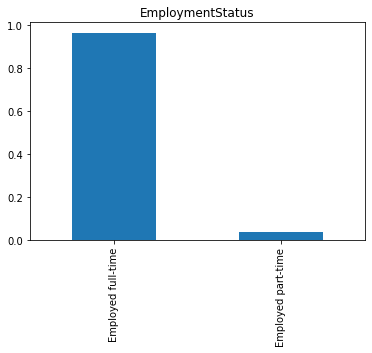

In [7]:
employment_status = usa_industry.EmploymentStatus.value_counts()
#Provide a pandas series of the counts for each YearsProgram status

# Bar chart proportion of each YearsProgram status

(employment_status/usa_industry.shape[0]).plot(kind="bar");
plt.title("EmploymentStatus");

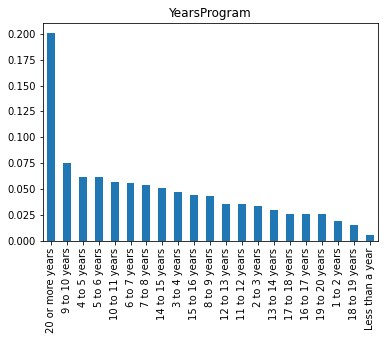

In [8]:
years_of_programing = usa_industry.YearsProgram.value_counts()
#Provide a pandas series of the counts for each YearsProgram status

# Bar chart proportion of each YearsProgram status

(years_of_programing/usa_industry.shape[0]).plot(kind="bar");
plt.title("YearsProgram");

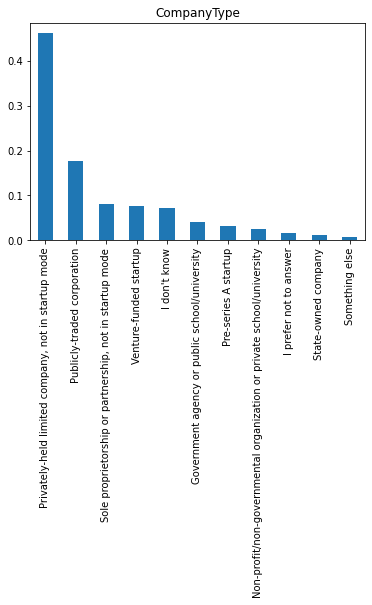

In [9]:
company_type = usa_industry.CompanyType.value_counts()
#Provide a pandas series of the counts for each CompanyType

# Bar chart proportion of company type

(company_type/usa_industry.shape[0]).plot(kind="bar");
plt.title("CompanyType");

In [19]:
company_infor = usa_industry.groupby(['YearsProgram','CompanyType','EmploymentStatus'], as_index = False)['Salary'].mean()
company_infor.head()

,YearsProgram,CompanyType,EmploymentStatus,Salary
0,1 to 2 years,Government agency or public school/university,Employed full-time,25180.957266
1,1 to 2 years,I don't know,Employed full-time,31382.639307
2,1 to 2 years,I don't know,Employed part-time,3842.607283
3,1 to 2 years,I prefer not to answer,Employed full-time,21158.942491
4,1 to 2 years,Non-profit/non-governmental organization or private school/university,Employed full-time,25563.270573


In [62]:
# Dropping all the " I dont know ", I prefer not to answer" or "Something else"
exclude1 = ["I don't know", "I prefer not to answer", "Something else"]
company_exclude= company_infor[~company_infor['CompanyType'].isin(exclude1)]
company_exclude.head()



,YearsProgram,CompanyType,EmploymentStatus,Salary
0,1 to 2 years,Government agency or public school/university,Employed full-time,25180.957266
4,1 to 2 years,Non-profit/non-governmental organization or private school/university,Employed full-time,25563.270573
5,1 to 2 years,Pre-series A startup,Employed full-time,30297.520814
7,1 to 2 years,"Privately-held limited company, not in startup mode",Employed full-time,33453.040821
9,1 to 2 years,Publicly-traded corporation,Employed full-time,68413.751037


In [65]:
# drop part time employment information

exclude2 = ["Employed part-time"]
comp_new= company_exclude[~company_exclude['EmploymentStatus'].isin(exclude2)]
comp_new

,YearsProgram,CompanyType,EmploymentStatus,Salary
0,1 to 2 years,Government agency or public school/university,Employed full-time,25180.957266
4,1 to 2 years,Non-profit/non-governmental organization or private school/university,Employed full-time,25563.270573
5,1 to 2 years,Pre-series A startup,Employed full-time,30297.520814
7,1 to 2 years,"Privately-held limited company, not in startup mode",Employed full-time,33453.040821
9,1 to 2 years,Publicly-traded corporation,Employed full-time,68413.751037
10,1 to 2 years,"Sole proprietorship or partnership, not in startup mode",Employed full-time,16638.119614
12,1 to 2 years,State-owned company,Employed full-time,13536.604390
14,1 to 2 years,Venture-funded startup,Employed full-time,41539.686469
15,10 to 11 years,Government agency or public school/university,Employed full-time,33682.499093
20,10 to 11 years,Non-profit/non-governmental organization or private school/university,Employed full-time,59300.264266


In [66]:
senior = comp_new[comp_new['YearsProgram'] =="20 or more years"]
senior.head()

,YearsProgram,CompanyType,EmploymentStatus,Salary
187,20 or more years,Government agency or public school/university,Employed full-time,70481.137259
192,20 or more years,Non-profit/non-governmental organization or private school/university,Employed full-time,78844.425508
194,20 or more years,Pre-series A startup,Employed full-time,89086.074819
196,20 or more years,"Privately-held limited company, not in startup mode",Employed full-time,77765.141528
198,20 or more years,Publicly-traded corporation,Employed full-time,101108.558402


In [67]:
senior.describe()

,Salary
count,8.000000
mean,81108.399510
std,17018.801528
min,53918.568018
25%,71516.074807
50%,78304.783518
75%,92091.695715
max,105802.236558


In [68]:
senior.groupby(['Salary'], as_index = False)['CompanyType'].max()

,Salary,CompanyType
0,53918.568018,State-owned company
1,70481.137259,Government agency or public school/university
2,71861.053989,"Sole proprietorship or partnership, not in startup mode"
3,77765.141528,"Privately-held limited company, not in startup mode"
4,78844.425508,Non-profit/non-governmental organization or private school/university
5,89086.074819,Pre-series A startup
6,101108.558402,Publicly-traded corporation
7,105802.236558,Venture-funded startup


In [69]:
# get the exoerience information
# group by company and experience then get the avg salary
# unstack the results to move the experience as columns to create the series
# experience = company_infor.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()

experience = comp_new.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").unstack()
experience.head()

CompanyType,Government agency or public school/university,Non-profit/non-governmental organization or private school/university,Pre-series A startup,"Privately-held limited company, not in startup mode",Publicly-traded corporation,"Sole proprietorship or partnership, not in startup mode",State-owned company,Venture-funded startup
YearsProgram,,,,,,,,
0 to 1 year,51881.720430,23586.665993,9605.804336,21301.213848,47500.000000,21993.198726,1566.284875,48130.957239
1 to 2 years,25180.957266,25563.270573,30297.520814,33453.040821,68413.751037,16638.119614,13536.604390,41539.686469
10 to 11 years,33682.499093,59300.264266,53135.552911,45490.428913,67050.412420,37460.887378,24467.155945,54175.007244
11 to 12 years,61484.164223,70863.601384,46441.304815,48389.608461,74045.962314,45100.565788,44442.675159,76882.624722
12 to 13 years,57116.161517,49304.023876,44173.811038,51252.731169,76279.147053,42597.920233,40668.665191,72682.732262


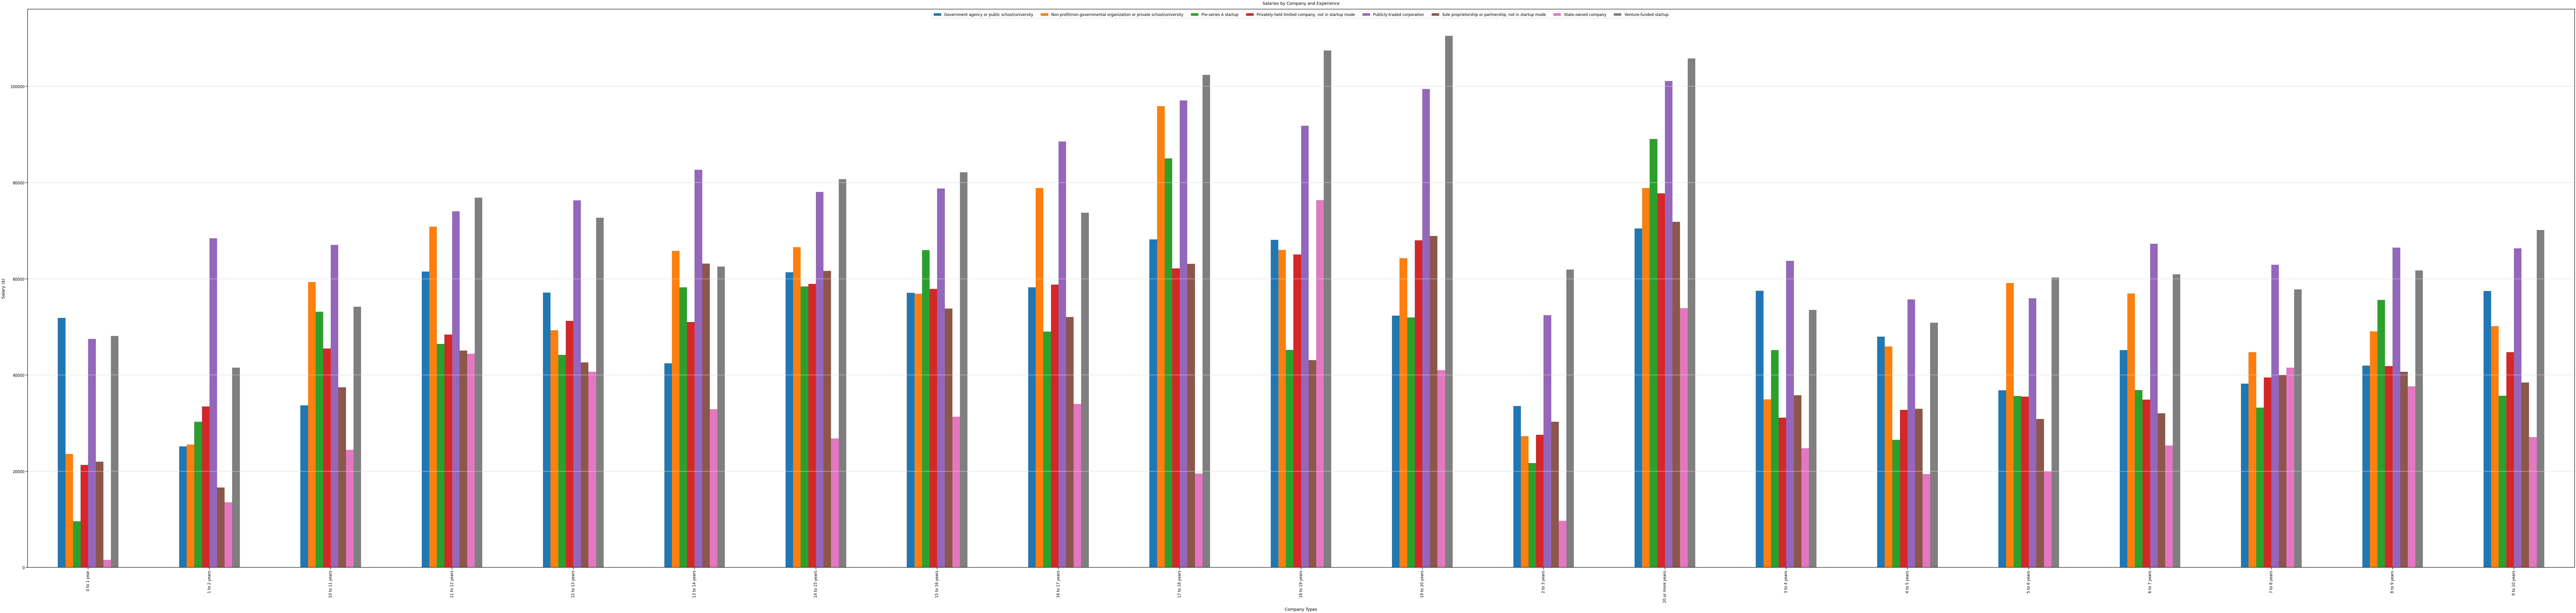

In [70]:

# create the clusterd chart
sns.set_context('talk')
plot = experience.plot.bar(figsize=(200, 45), width=0.5)
plot.legend(loc="upper center",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=20)
plot.set_ylabel('Salary ($)', labelpad=20)
plot.set_title('Salaries by Company and Experience', pad=20)
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)

In [76]:
# comp_new['YearsProgram'] = company_infor['YearsProgram'].replace({'Less than a year': "0 to 1 year" })
# comp_new

In [146]:
year1_5 = ["0 to 1 year", "1 to 2 years", "2 to 3 years", "3 to 4 years", "4 to 5 years"]
experience1_5 = comp_new[company_new['YearsProgram'].isin(year1_5)]
experience1_5.head()

,YearsProgram,CompanyType,EmploymentStatus,Salary
0,1 to 2 years,Government agency or public school/university,Employed full-time,25180.957266
4,1 to 2 years,Non-profit/non-governmental organization or private school/university,Employed full-time,25563.270573
5,1 to 2 years,Pre-series A startup,Employed full-time,30297.520814
7,1 to 2 years,"Privately-held limited company, not in startup mode",Employed full-time,33453.040821
9,1 to 2 years,Publicly-traded corporation,Employed full-time,68413.751037


In [81]:
# experience1_5 = experience1_5.groupby(["YearsProgram", "CompanyType"])['Salary'].mean().rename("Salary").unstack()
experience1_5 = experience1_5.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience1_5

CompanyType,Government agency or public school/university,Non-profit/non-governmental organization or private school/university,Pre-series A startup,"Privately-held limited company, not in startup mode",Publicly-traded corporation,"Sole proprietorship or partnership, not in startup mode",State-owned company,Venture-funded startup
YearsProgram,,,,,,,,
0 to 1 year,51881.720430,23586.665993,9605.804336,21301.213848,47500.000000,21993.198726,1566.284875,48130.957239
1 to 2 years,25180.957266,25563.270573,30297.520814,33453.040821,68413.751037,16638.119614,13536.604390,41539.686469
2 to 3 years,33557.553275,27275.572543,21718.708010,27587.173072,52422.799567,30304.665846,9700.571077,61921.462292
3 to 4 years,57495.357260,34938.729437,45183.252799,31134.999780,63725.240236,35800.547243,24805.817521,53513.459160
4 to 5 years,47971.079644,45943.378165,26526.491969,32771.100211,55721.529101,32968.198349,19402.976358,50888.041130


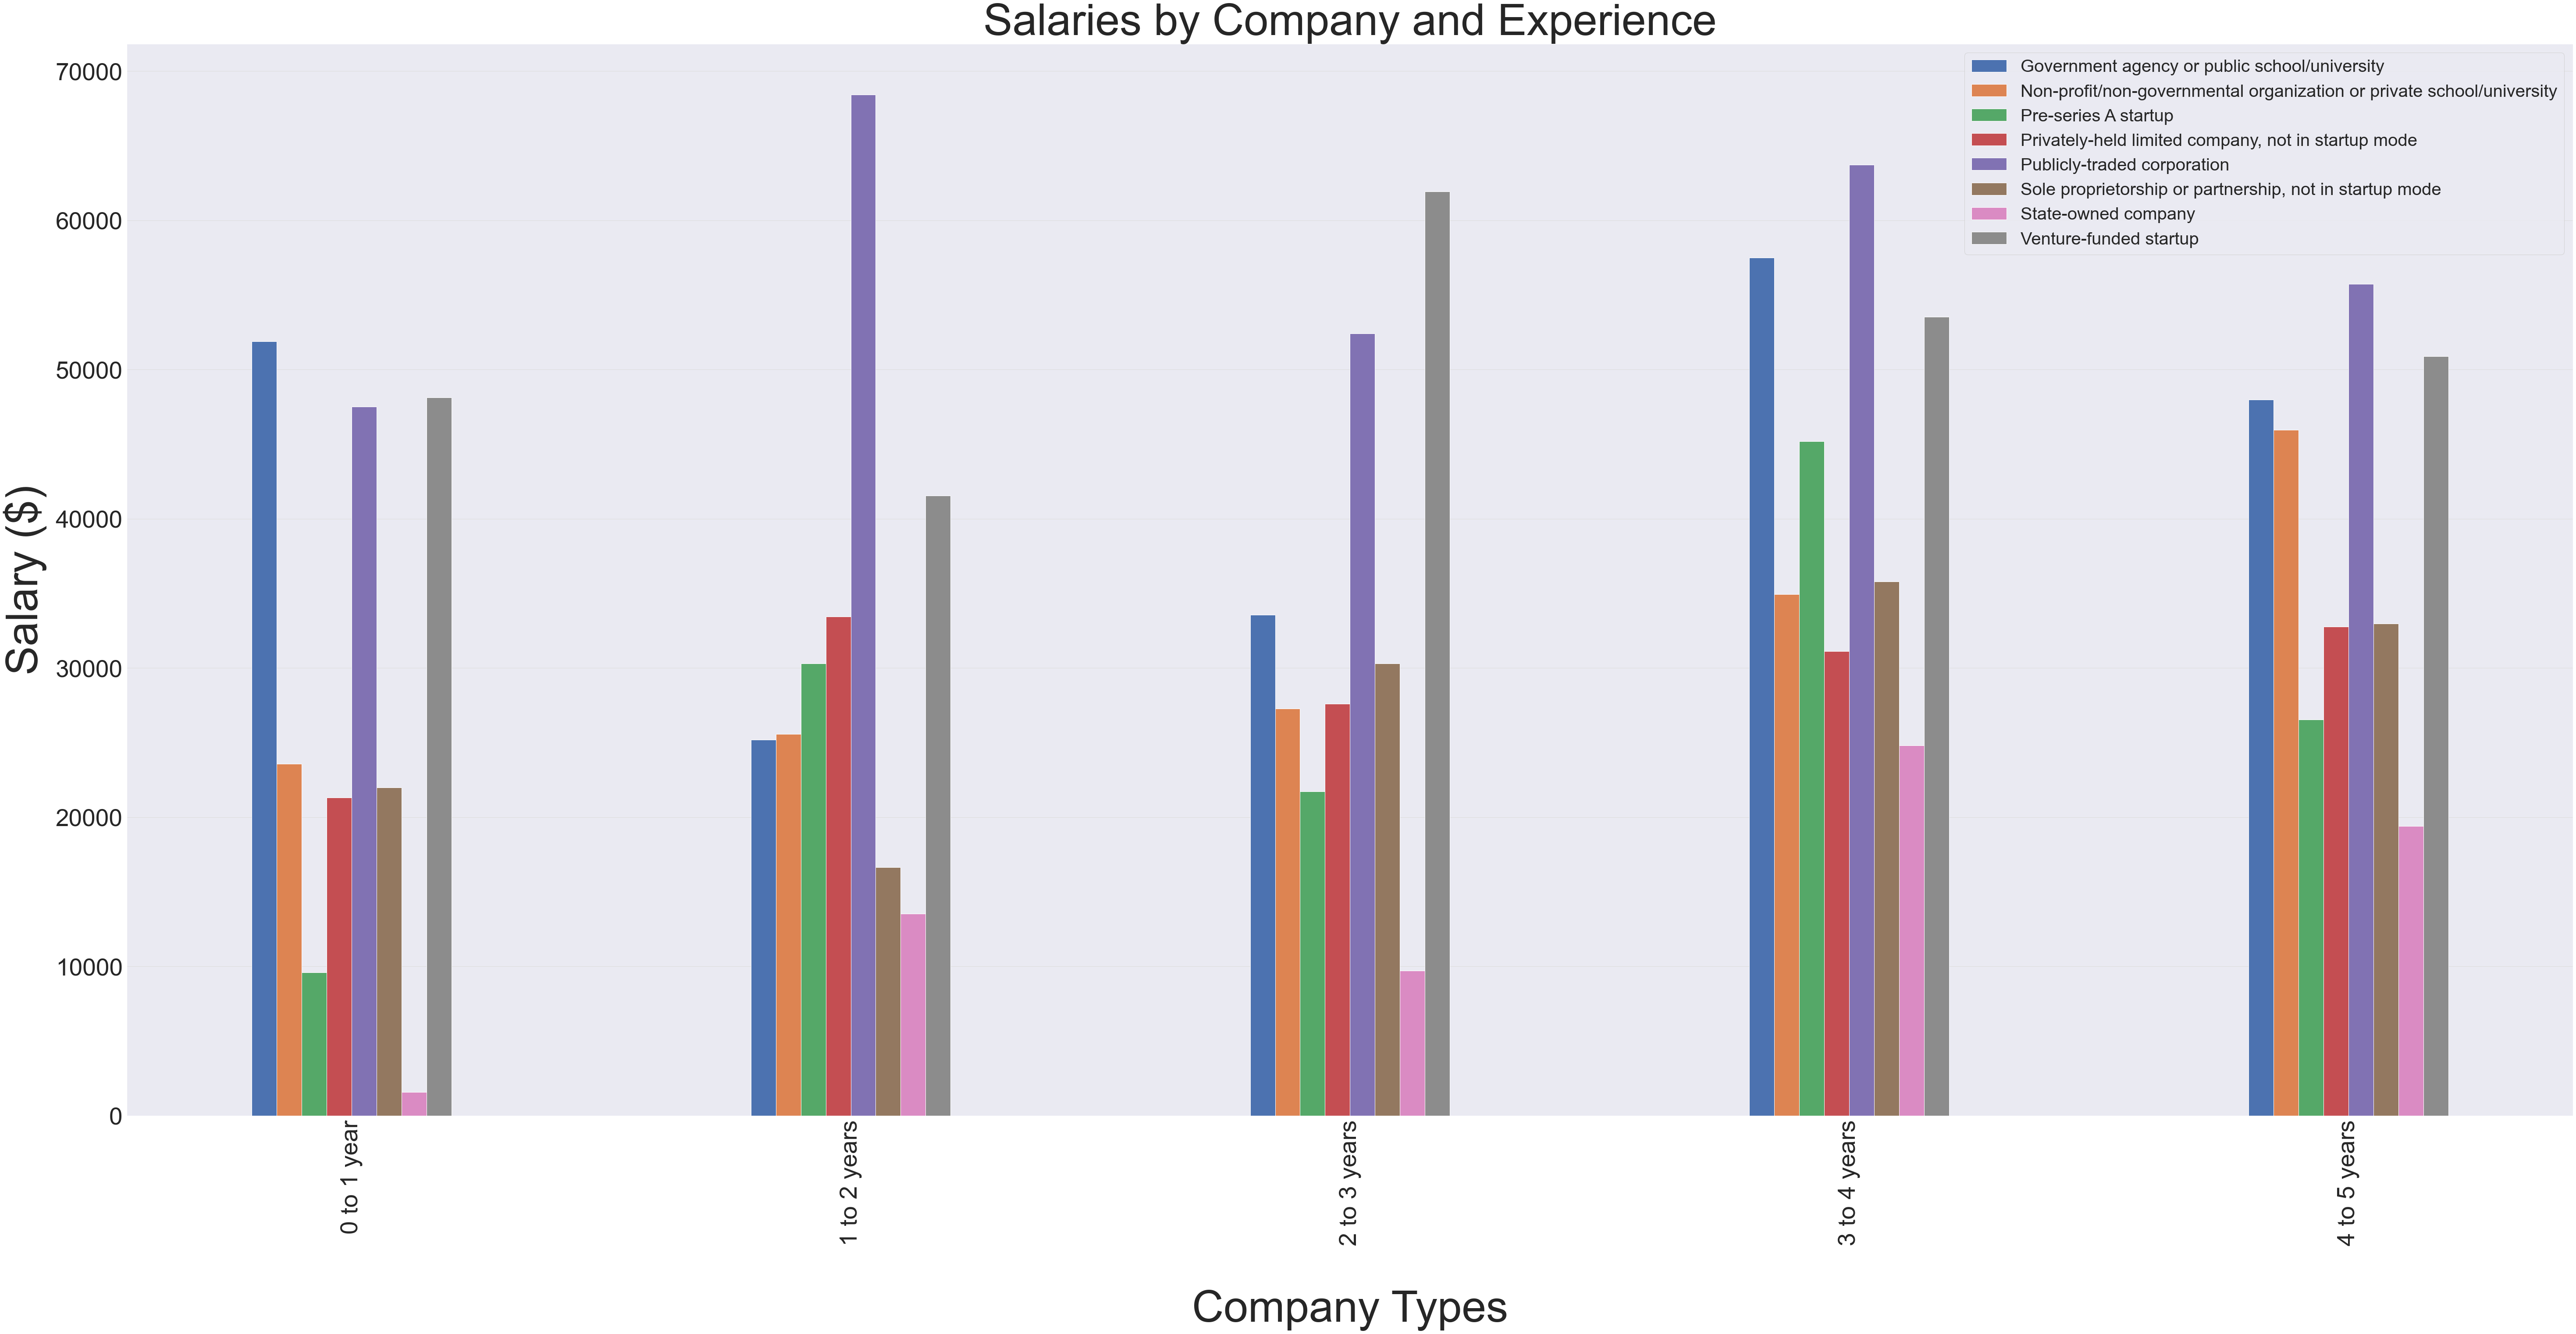

In [144]:
# create the clusterd chart
sns.set_context('talk')
sns.set(font_scale=5)
plot = experience1_5.plot.bar(figsize=(100, 45), width=0.4)
plot.legend(loc="upper right",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=100, fontsize = 100)
plot.set_ylabel('Salary ($)', labelpad=20, fontsize = 100)
plot.set_title('Salaries by Company and Experience', pad=20, fontsize = 100)
plt.legend(fontsize='40', title_fontsize='40')
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)

In [145]:
year5_10 = ["5 to 6 years", "6 to 7 years", "7 to 8 years", "8 to 9 years", "9 to 10 years"]
experience5_10 = comp_new[company_new['YearsProgram'].isin(year5_10)]
experience5_10.head()

,YearsProgram,CompanyType,EmploymentStatus,Salary
243,5 to 6 years,Government agency or public school/university,Employed full-time,36842.480097
249,5 to 6 years,Non-profit/non-governmental organization or private school/university,Employed full-time,59135.649297
251,5 to 6 years,Pre-series A startup,Employed full-time,35659.744444
253,5 to 6 years,"Privately-held limited company, not in startup mode",Employed full-time,35490.116268
255,5 to 6 years,Publicly-traded corporation,Employed full-time,55935.849468


In [114]:
# unstack

experience5_10 = experience5_10.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience5_10

CompanyType,Government agency or public school/university,Non-profit/non-governmental organization or private school/university,Pre-series A startup,"Privately-held limited company, not in startup mode",Publicly-traded corporation,"Sole proprietorship or partnership, not in startup mode",State-owned company,Venture-funded startup
YearsProgram,,,,,,,,
5 to 6 years,36842.480097,59135.649297,35659.744444,35490.116268,55935.849468,30858.454259,20009.241451,60280.979254
6 to 7 years,45204.466769,56937.283391,36861.533097,34900.781523,67299.494972,32045.649396,25366.876124,60947.129102
7 to 8 years,38185.555306,44738.633046,33225.051956,39481.080622,62931.288518,40008.456301,41516.701513,57793.819124
8 to 9 years,41962.929240,49076.614111,55640.676281,41859.960039,66476.728857,40674.371575,37646.627566,61748.469668
9 to 10 years,57462.624876,50168.449199,35675.821289,44744.920815,66327.302330,38463.538043,27092.635433,70150.469208


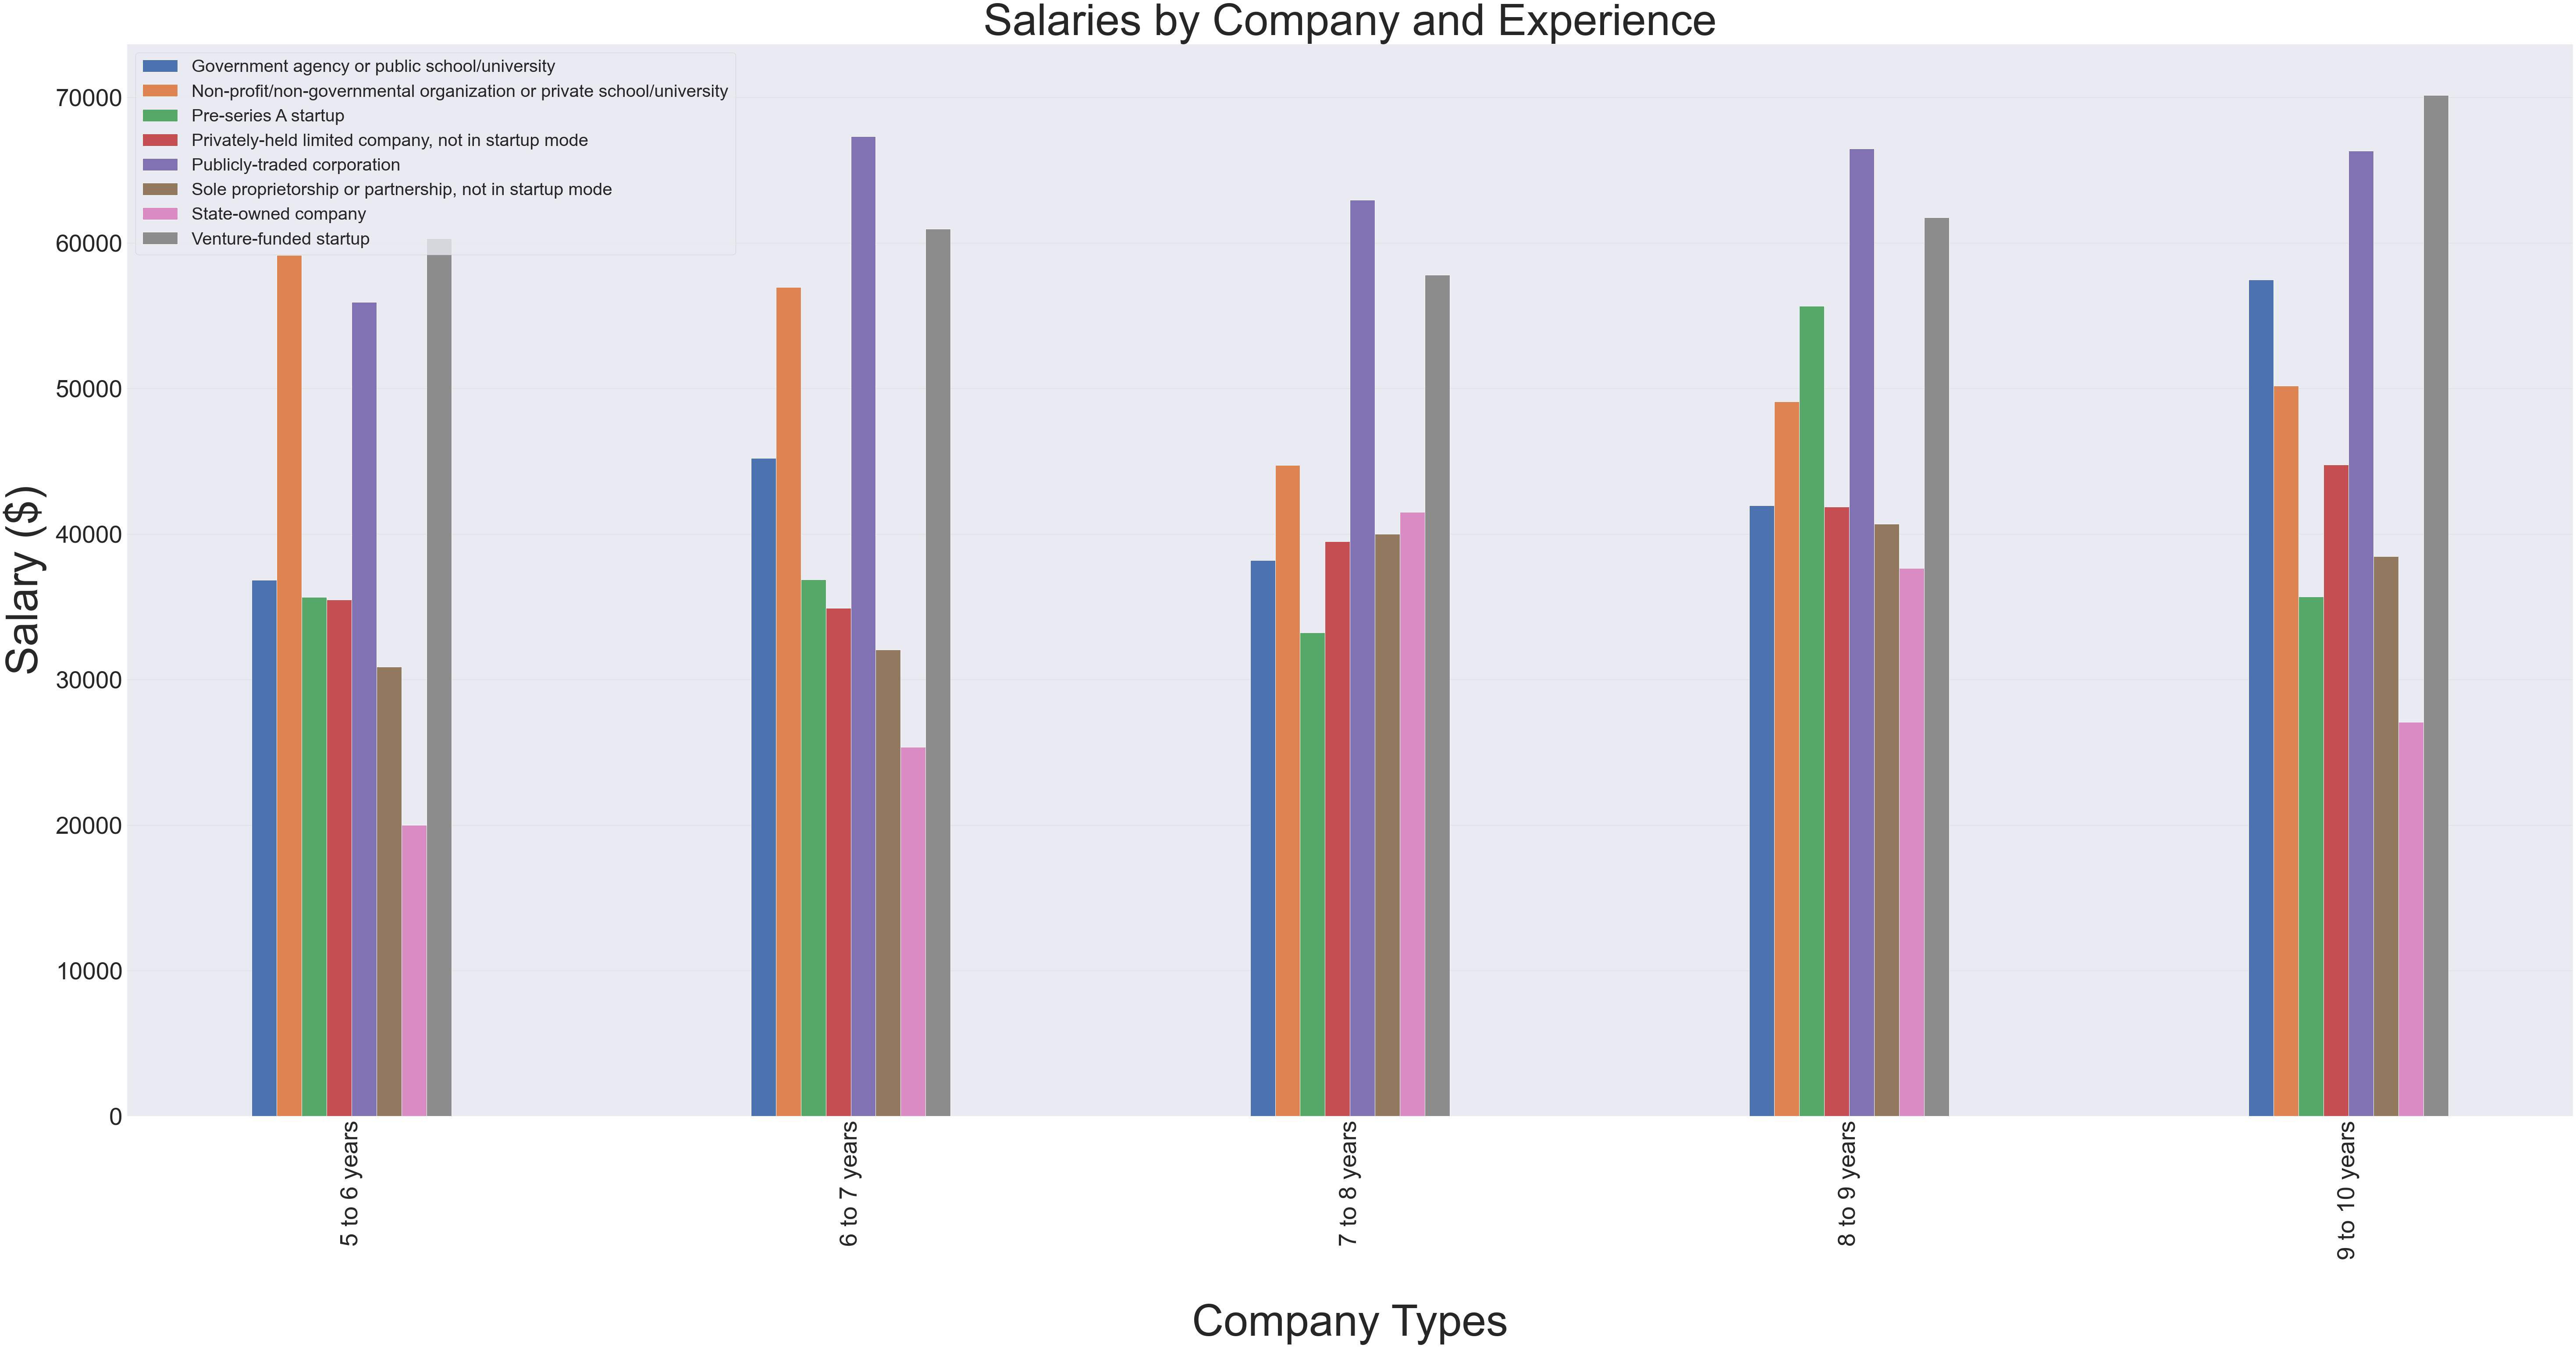

In [119]:
# create the clusterd chart
sns.set_context('talk')
sns.set(font_scale=5)
plot = experience5_10.plot.bar(figsize=(100, 45), width=0.4)
plot.legend(loc="upper right",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=100, fontsize = 100)
plot.set_ylabel('Salary ($)', labelpad=20, fontsize = 100)
plot.set_title('Salaries by Company and Experience', pad=20, fontsize = 100)
plt.legend(fontsize='40', title_fontsize='40')
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)

In [147]:
year10_15 = ["10 to 11 years", "11 to 12 years", "12 to 13 years", "13 to 14 years", "14 to 15 years"]
experience10_15 = comp_new[company_new['YearsProgram'].isin(year10_15)]
experience10_15.head()


,YearsProgram,CompanyType,EmploymentStatus,Salary
15,10 to 11 years,Government agency or public school/university,Employed full-time,33682.499093
20,10 to 11 years,Non-profit/non-governmental organization or private school/university,Employed full-time,59300.264266
21,10 to 11 years,Pre-series A startup,Employed full-time,53135.552911
23,10 to 11 years,"Privately-held limited company, not in startup mode",Employed full-time,45490.428913
25,10 to 11 years,Publicly-traded corporation,Employed full-time,67050.412420


In [129]:
experience10_15 = experience10_15.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience10_15

CompanyType,Government agency or public school/university,Non-profit/non-governmental organization or private school/university,Pre-series A startup,"Privately-held limited company, not in startup mode",Publicly-traded corporation,"Sole proprietorship or partnership, not in startup mode",State-owned company,Venture-funded startup
YearsProgram,,,,,,,,
10 to 11 years,33682.499093,59300.264266,53135.552911,45490.428913,67050.412420,37460.887378,24467.155945,54175.007244
11 to 12 years,61484.164223,70863.601384,46441.304815,48389.608461,74045.962314,45100.565788,44442.675159,76882.624722
12 to 13 years,57116.161517,49304.023876,44173.811038,51252.731169,76279.147053,42597.920233,40668.665191,72682.732262
13 to 14 years,42422.222468,65829.920169,58250.981412,50999.551832,82642.900136,63158.211316,32896.112789,62533.911394
14 to 15 years,61379.728150,66578.242064,58428.856918,58916.335480,78054.398377,61632.032274,26808.695358,80736.329396


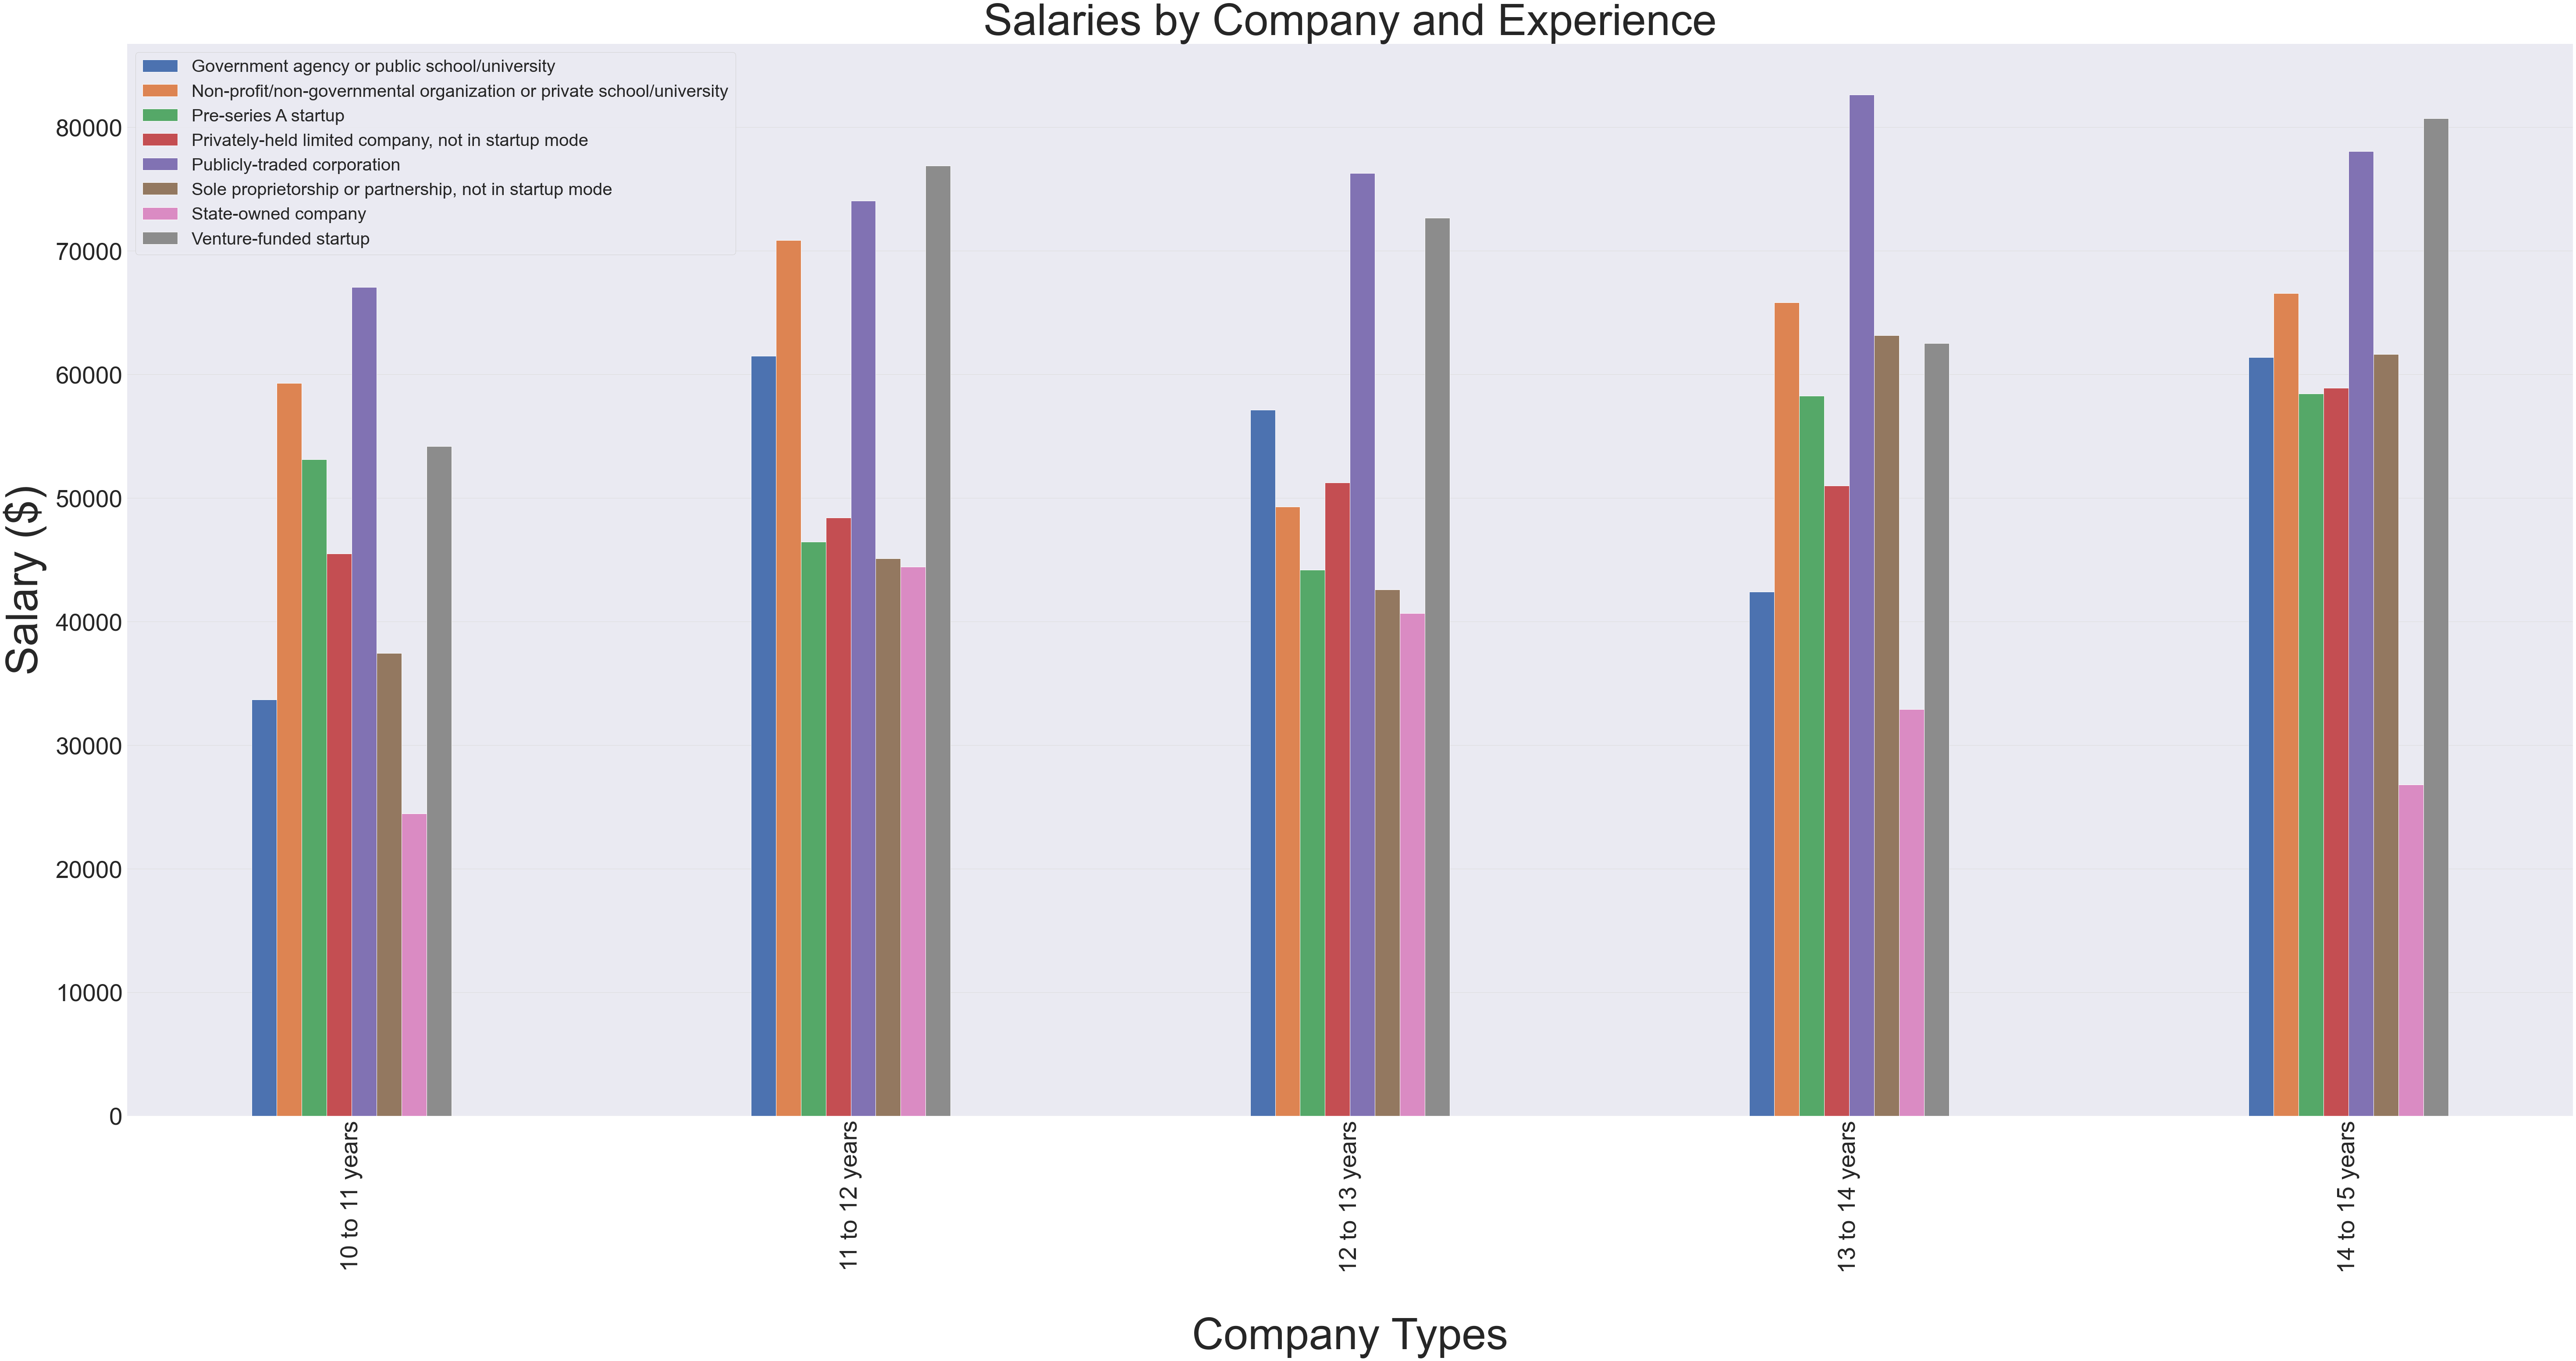

In [131]:
# create the clusterd chart
sns.set_context('talk')
sns.set(font_scale=5)
plot = experience10_15.plot.bar(figsize=(100, 45), width=0.4)
plot.legend(loc="upper right",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=100, fontsize = 100)
plot.set_ylabel('Salary ($)', labelpad=20, fontsize = 100)
plot.set_title('Salaries by Company and Experience', pad=20, fontsize = 100)
plt.legend(fontsize='40', title_fontsize='40')
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)

In [148]:
year15_20 = ["15 to 16 years", "16 to 17 years", "17 to 18 years", "18 to 19 years", "19 to 20 years"]
experience15_20 = comp_new[company_new['YearsProgram'].isin(year15_20)]
experience15_20.head()


,YearsProgram,CompanyType,EmploymentStatus,Salary
97,15 to 16 years,Government agency or public school/university,Employed full-time,57100.894109
100,15 to 16 years,Non-profit/non-governmental organization or private school/university,Employed full-time,56919.045956
101,15 to 16 years,Pre-series A startup,Employed full-time,65973.770449
103,15 to 16 years,"Privately-held limited company, not in startup mode",Employed full-time,57904.867656
105,15 to 16 years,Publicly-traded corporation,Employed full-time,78747.759359


In [138]:
experience15_20 = experience15_20.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience15_20

CompanyType,Government agency or public school/university,Non-profit/non-governmental organization or private school/university,Pre-series A startup,"Privately-held limited company, not in startup mode",Publicly-traded corporation,"Sole proprietorship or partnership, not in startup mode",State-owned company,Venture-funded startup
YearsProgram,,,,,,,,
15 to 16 years,57100.894109,56919.045956,65973.770449,57904.867656,78747.759359,53799.426107,31338.291349,82141.911224
16 to 17 years,58250.306772,78844.919941,49047.720608,58781.793724,88521.611895,52059.363943,33964.472183,73739.046693
17 to 18 years,68167.728111,95889.987903,85036.762287,62164.587641,97079.123790,63102.058957,19514.738125,102376.595880
18 to 19 years,68110.339687,66029.066502,45223.780160,65040.339843,91803.817329,43083.430644,76337.054758,107453.835811
19 to 20 years,52332.023240,64317.543717,51962.365591,68001.438701,99440.992003,68922.327967,40986.108325,110518.868972


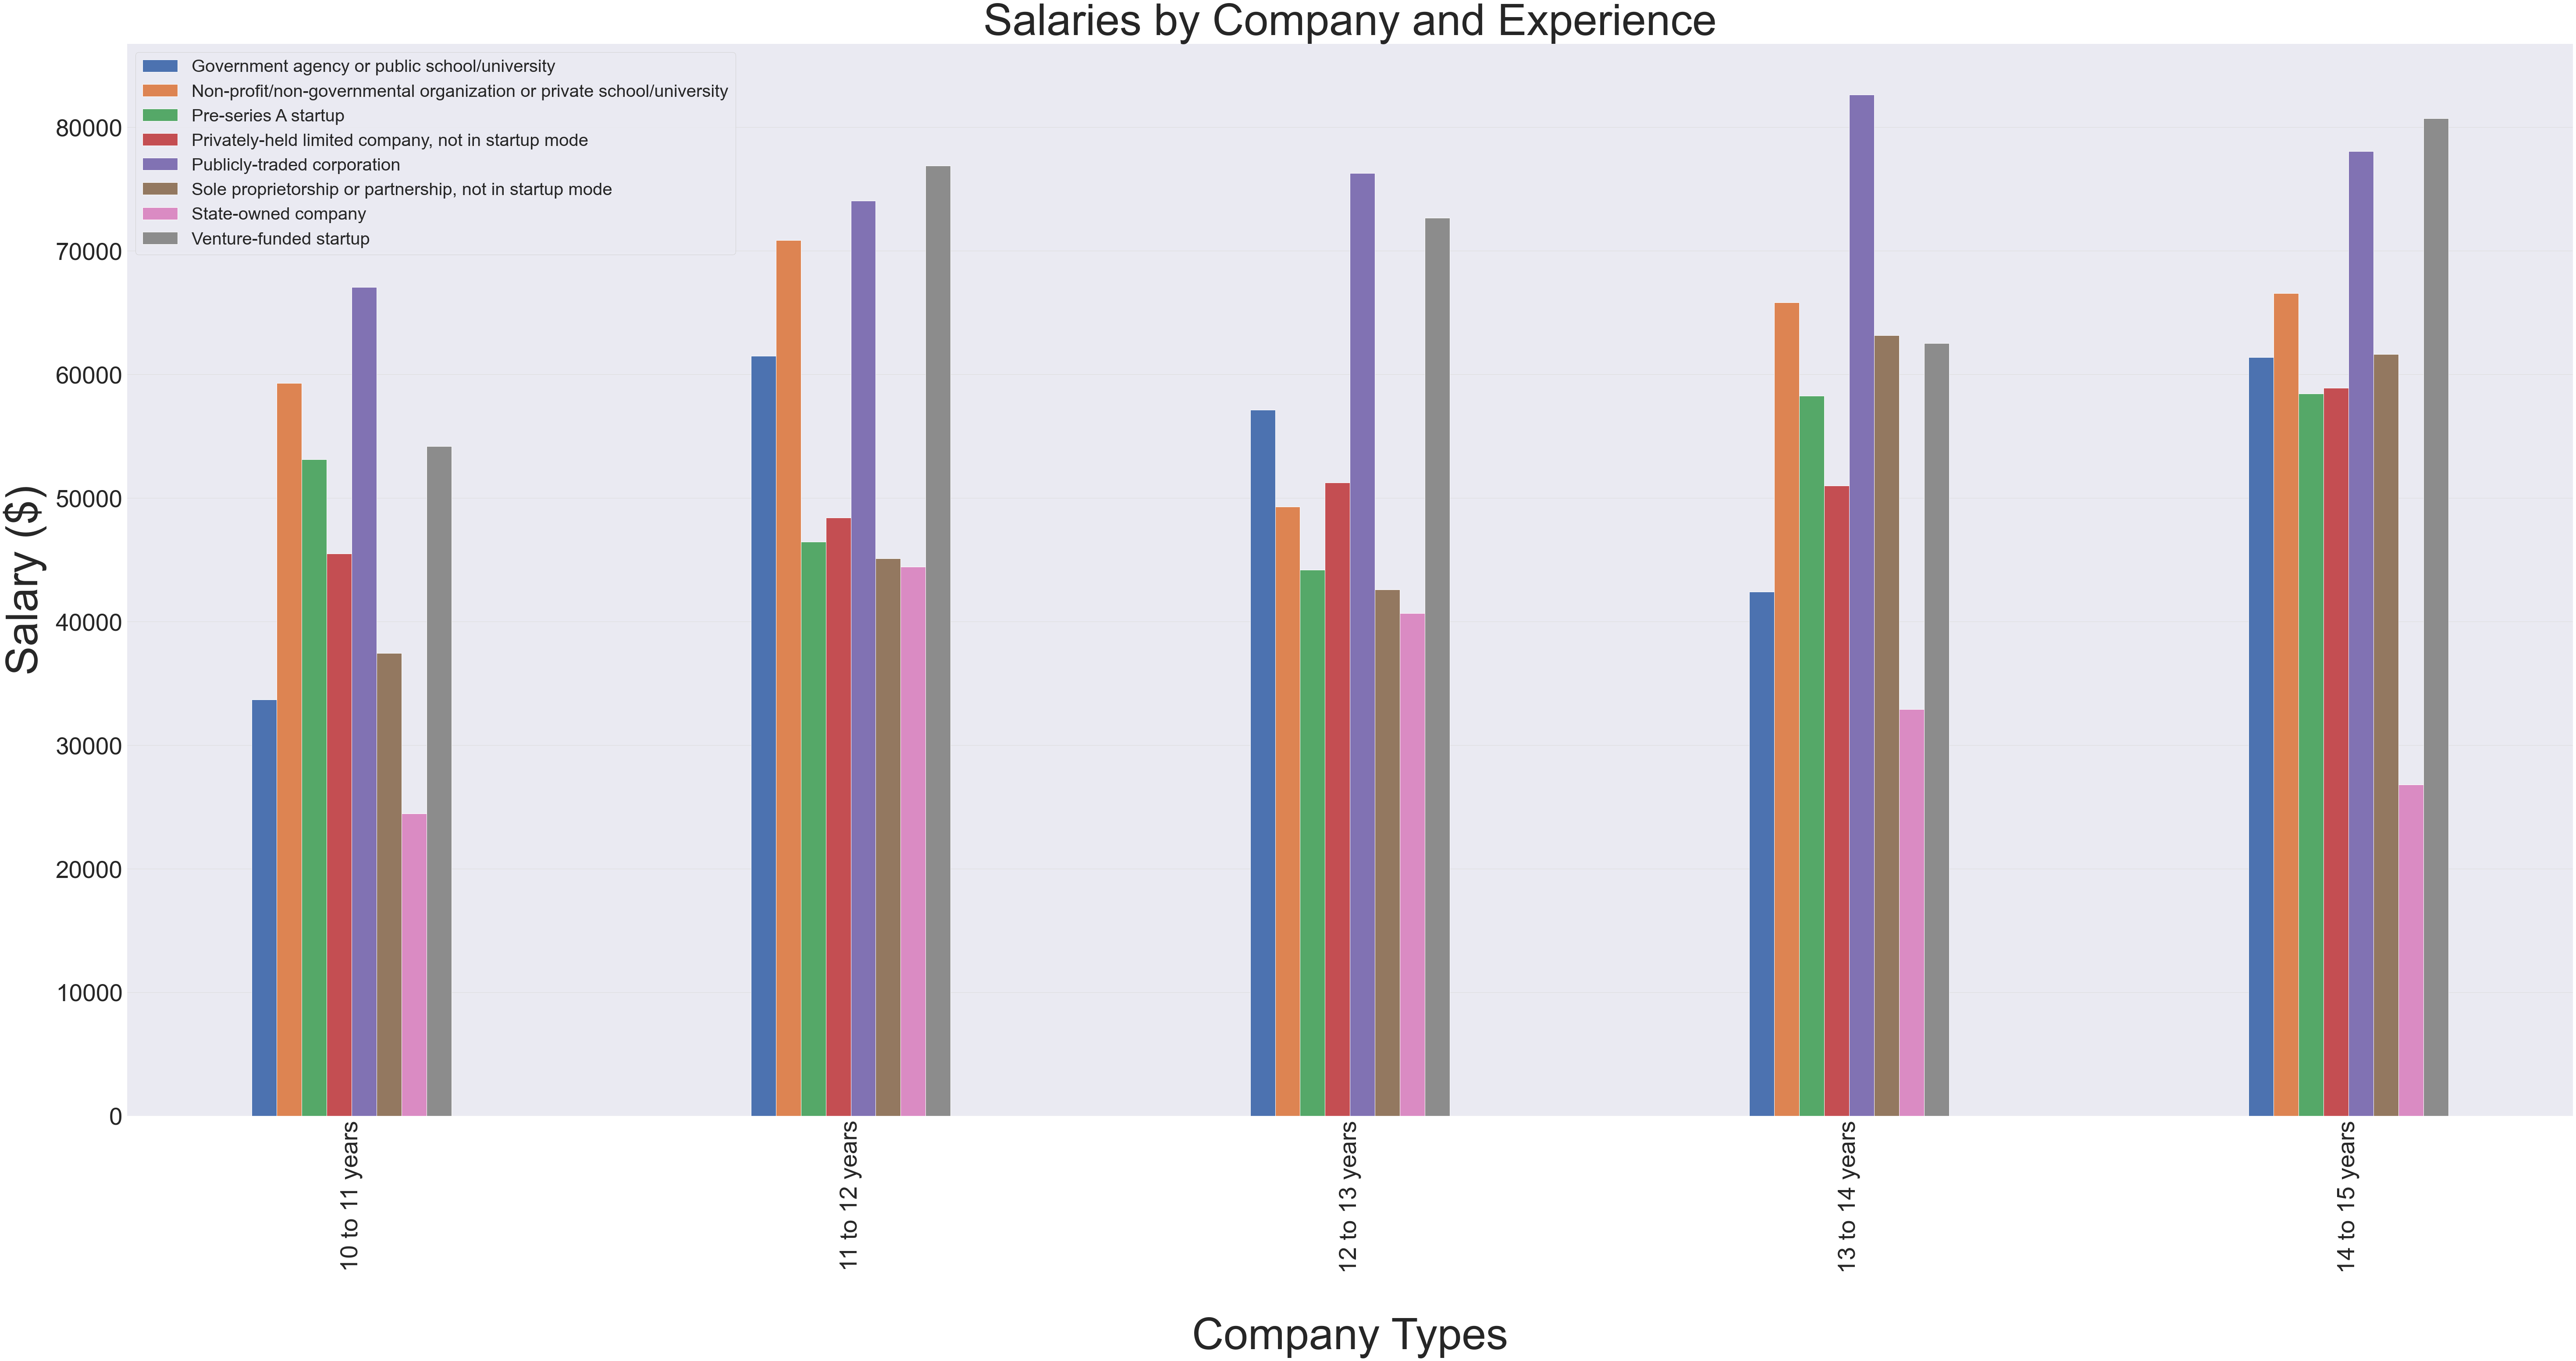

In [139]:
# create the clusterd chart
sns.set_context('talk')
sns.set(font_scale=5)
plot = experience10_15.plot.bar(figsize=(100, 45), width=0.4)
plot.legend(loc="upper right",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=100, fontsize = 100)
plot.set_ylabel('Salary ($)', labelpad=20, fontsize = 100)
plot.set_title('Salaries by Company and Experience', pad=20, fontsize = 100)
plt.legend(fontsize='40', title_fontsize='40')
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)

In [149]:
year20_or_more = ["20 or more years"]
experience20_or_more = comp_new[company_new['YearsProgram'].isin(year20_or_more)]
experience20_or_more.head()

,YearsProgram,CompanyType,EmploymentStatus,Salary
187,20 or more years,Government agency or public school/university,Employed full-time,70481.137259
192,20 or more years,Non-profit/non-governmental organization or private school/university,Employed full-time,78844.425508
194,20 or more years,Pre-series A startup,Employed full-time,89086.074819
196,20 or more years,"Privately-held limited company, not in startup mode",Employed full-time,77765.141528
198,20 or more years,Publicly-traded corporation,Employed full-time,101108.558402


In [141]:
experience20_or_more = experience20_or_more.groupby(["YearsProgram","CompanyType"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience20_or_more

CompanyType,Government agency or public school/university,Non-profit/non-governmental organization or private school/university,Pre-series A startup,"Privately-held limited company, not in startup mode",Publicly-traded corporation,"Sole proprietorship or partnership, not in startup mode",State-owned company,Venture-funded startup
YearsProgram,,,,,,,,
20 or more years,70481.137259,78844.425508,89086.074819,77765.141528,101108.558402,71861.053989,53918.568018,105802.236558


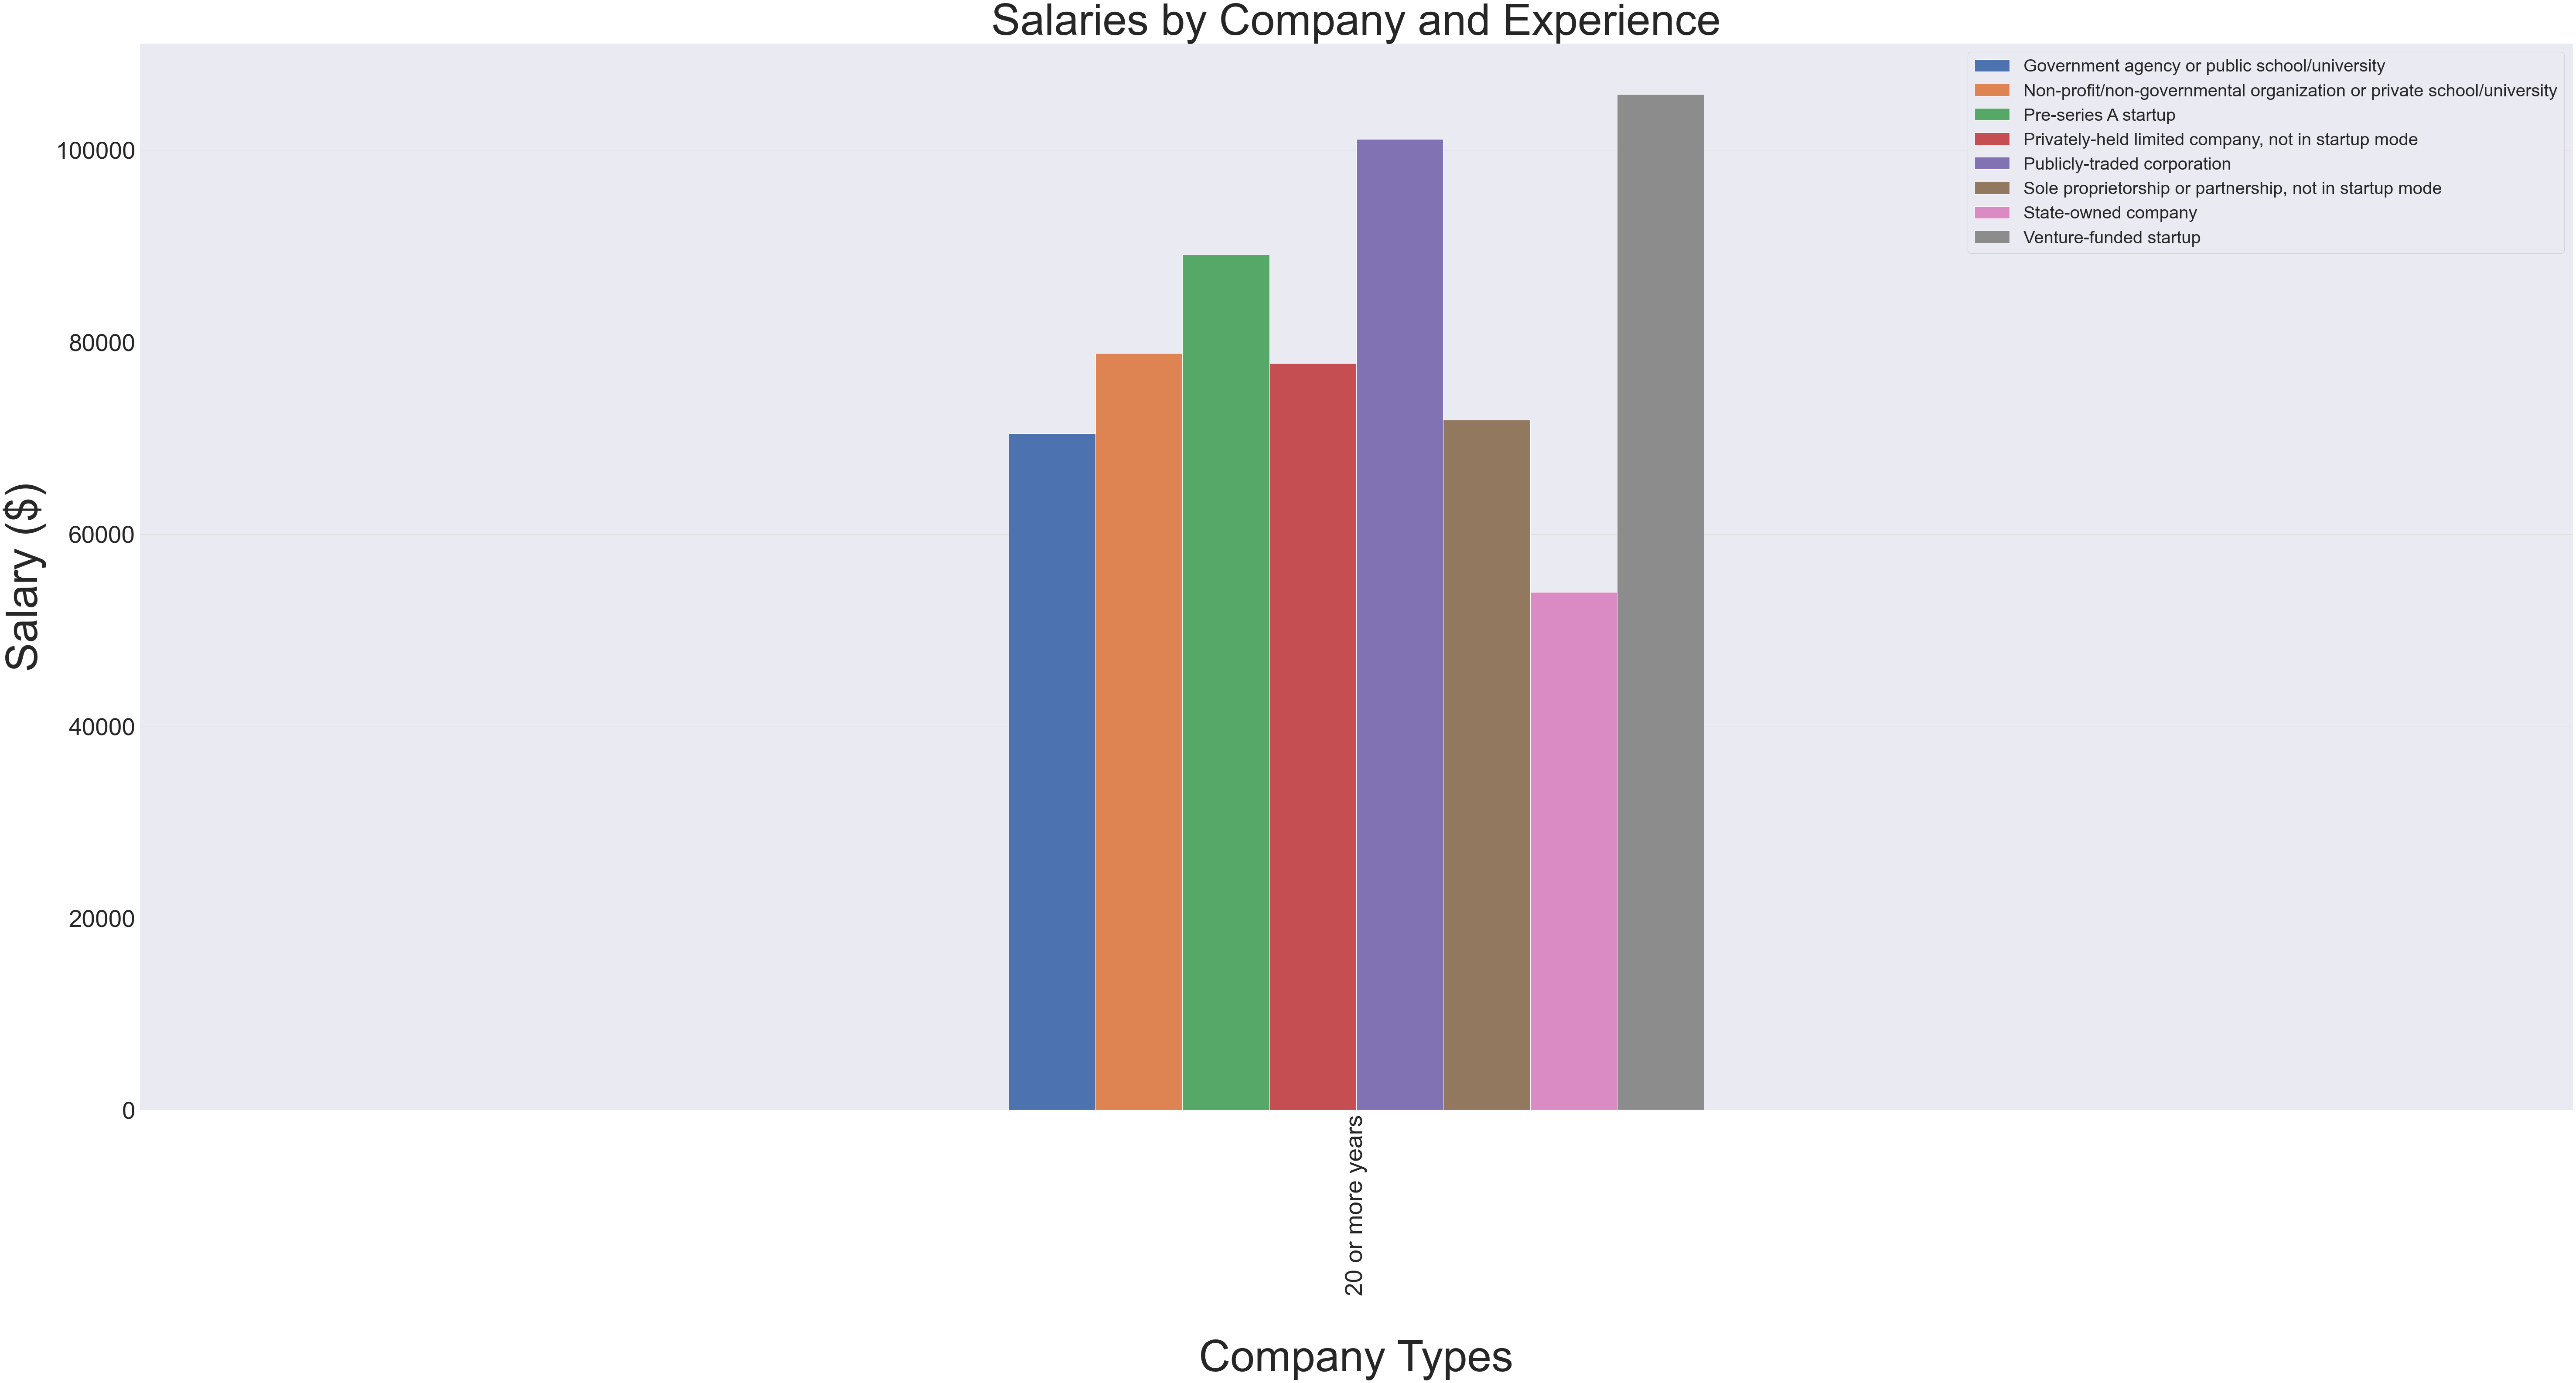

In [143]:
# create the clusterd chart
sns.set_context('talk')
sns.set(font_scale=5)
plot = experience20_or_more.plot.bar(figsize=(100, 45), width=0.2)
plot.legend(loc="upper right",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=100, fontsize = 100)
plot.set_ylabel('Salary ($)', labelpad=20, fontsize = 100)
plot.set_title('Salaries by Company and Experience', pad=20, fontsize = 100)
plt.legend(fontsize='40', title_fontsize='40')
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)